In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv('profiles.csv')

In [27]:
df.head()

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,...,pets,religion,sex,sign,smokes,speaks,status,agereduce,dietR,smokeChange
0,22,a little extra,strictly anything,socially,never,working on college/university,about me:<br />\n<br />\ni would love to think...,currently working as an international agent fo...,making people laugh.<br />\nranting about a go...,"the way i look. i am a six foot half asian, ha...",...,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single,20,anything,no
1,35,average,mostly other,often,sometimes,working on space camp,i am a chef: this is what that means.<br />\n1...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,...,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single,40,other,yes
2,38,thin,anything,socially,NaN,graduated from masters program,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,...,has cats,NaN,m,pisces but it doesn&rsquo;t matter,no,"english, french, c++",available,40,anything,yes
3,23,thin,vegetarian,socially,NaN,working on college/university,i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,...,likes cats,NaN,m,pisces,no,"english, german (poorly)",single,20,vegetarian,yes
4,29,athletic,NaN,socially,never,graduated from college/university,hey how's it going? currently vague on the pro...,work work work work + play,creating imagery to look at:<br />\nhttp://bag...,i smile a lot and my inquisitive nature,...,likes dogs and likes cats,NaN,m,aquarius,no,english,single,30,NaN,yes


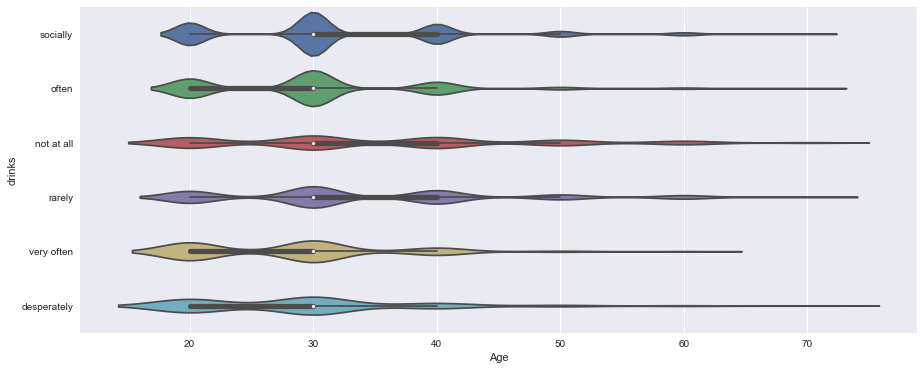

In [70]:
df['agereduce']=df['age'].apply(lambda x:round(x,-1) )
plt.figure(figsize=(15,6))
sns.violinplot(data=df, x= 'agereduce', y='drinks')
plt.xlabel('Age')

we can see the age distribution per drinking habit

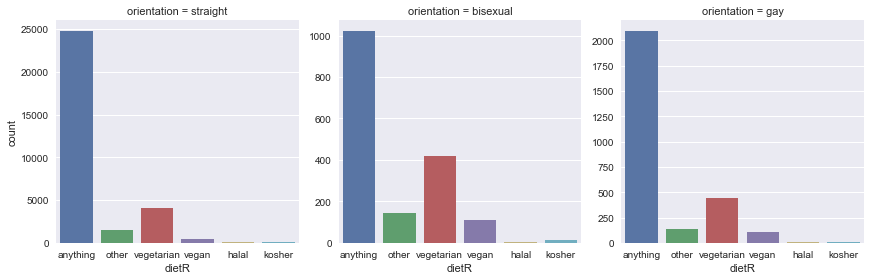

In [69]:
df['dietR']=df['diet'].dropna().apply(lambda x: x.split()[-1] )
sns.factorplot(data=df,col='orientation',x='dietR',kind='count',sharey=False)

we can see that the relative part of the vegeterians from the streight population is smaller then in the bisexual/gay population

In [48]:
def smokers(x):
    if x== 'sometimes'or x== 'when drinking':
        return 'sometimes'
    elif x=='no':
        return 'no'
    else:
        return 'yes'
df['smokeChange']= df['smokes'].dropna().apply(lambda x: smokers(x))

In [49]:
smoking=df.groupby(['orientation','smokes']).count()['sex'].unstack()
smoking.head()

smokes,no,sometimes,trying to quit,when drinking,yes
orientation,,,,,
bisexual,1707,321,96,193,228
gay,3961,387,158,338,258
straight,38228,3079,1226,2509,1745


In [50]:
smoking=df.groupby(['drinks','smokeChange']).count()['sex'].unstack()
tot=smoking.sum(1)
for smo in df['smokeChange'].dropna().unique():
    ls=smoking[smo].tolist()
    ls=ls/tot
    smoking[smo]=ls
smoking.head()   


#smoking.plot.bar(stacked=True)

#print([[x,smoking.count(x)] for x in set(smoking)])



#df.plot.bar(x="smokes",y='orientation',stacked=True)

smokeChange,no,sometimes,yes
drinks,,,
desperately,0.567474,0.235294,0.197232
not at all,0.864317,0.053649,0.082034
often,0.609430,0.226372,0.164198
rarely,0.871953,0.073807,0.054240
socially,0.821213,0.125550,0.053237


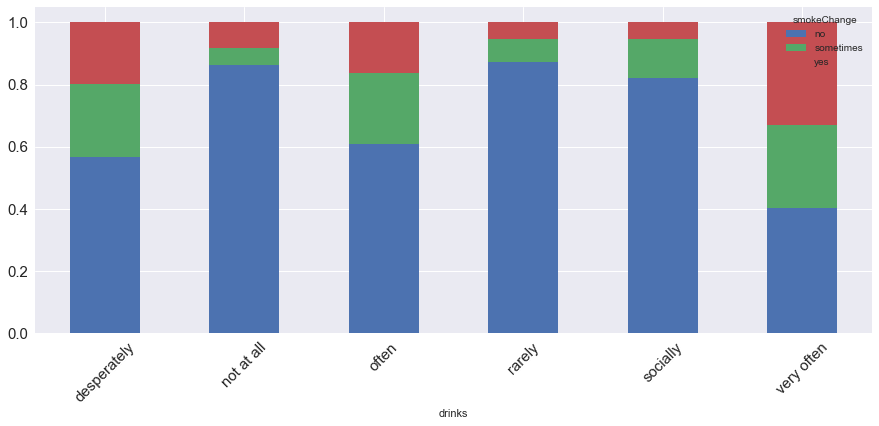

In [61]:
ax=smoking.plot.bar(stacked=True,figsize=(15,6))
ax.tick_params(axis='both', which='major', labelsize=15)
ax.set_xticklabels(list(ax.get_xticklabels()), rotation=45)
plt.show()

we can see that a more abundant part of the more often drinkers tend to smoke more

In [73]:
round(24,-1)

20